# Census Data Cleaning Scripts

In [4]:
starbucks = pd.concat([sg.get_sg_data('starbucks', 'oct'), sg.get_sg_data('starbucks', 'nov'), sg.get_sg_data('starbucks', 'dec')])
starbucks

,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,safegraph_brand_ids,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_opened_since,tracking_closed_since,polygon_wkt,polygon_class,building_height,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,census_block_group,number_devices_residing,cbg_pop
0,222-222@628-crw-gzf,sg:23dd1bc023ab48f7a38f164979091e20,zzw-223@628-crw-ghq,sg:581f447e5db848e882cd732a42594c8c,SG_BRAND_f116acfe9147494063e58da666d1d57e,Starbucks,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,40.458976,-75.373202,610 N West End Blvd,Quakertown,PA,18951,NaN,"Snacks,Counter Service,Dessert,Tea House,Coffe...",NaN,NaN,2019-12,2019-12,POLYGON ((-75.37379388185538 40.45893973417721...,OWNED_POLYGON,NaN,True,NaN,False,False,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222-222@628-pgk-st9,sg:c583c8490ef64b28a8fbadde1974a6bd,222-223@628-pgk-st9,sg:bc4e511025b64235b7291c750a50ea3f,SG_BRAND_f116acfe9147494063e58da666d1d57e,Starbucks,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,40.006572,-75.212198,4000 Monument Rd,Philadelphia,PA,19131,NaN,"Snacks,Counter Service,Dessert,Tea House,Coffe...",NaN,NaN,2019-12,2019-12,POLYGON ((-75.21152900916186 40.00693028283287...,OWNED_POLYGON,12.19,True,+12672335022,False,False,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzy-224@63s-cyc-sbk,sg:b6ec1197822149edad7b863bf14f163b,zzy-223@63s-cyc-psq,sg:a49ba51f2f6e4398b86e9c04f0eaa0cd,SG_BRAND_f116acfe9147494063e58da666d1d57e,Starbucks,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,40.166061,-75.290589,936 DeKalb Pike,Blue Bell,PA,19422,"{ ""Mon"": [[""5:00"", ""22:00""]], ""Tue"": [[""5:00"",...","Snacks,Counter Service,Dessert,Tea House,Coffe...",NaN,NaN,2019-12,2019-07,"POLYGON ((-75.2904898269557 40.16610710503888,...",SHARED_POLYGON,NaN,False,+12158403599,False,False,US,2020-10-01T00:00:00-04:00,2020-11-01T00:00:00-04:00,348.0,260.0,"[9,14,12,14,3,8,3,14,23,21,18,6,0,7,10,15,12,2...",420912032041,"{""420912032043"":20,""420912012013"":9,""420912032...","{""420912032043"":16,""420912068011"":15,""42091203...","{""US"":259}",5593.0,7.0,"{""<5"":23,""5-10"":255,""11-20"":30,""21-60"":24,""61-...","{""CVS"":24,""Panera Bread"":9,""Jules Thin Crust"":...","{""Wawa"":61,""CVS"":43,""Dunkin'"":32,""Target"":30,""...","[0,0,0,0,0,2,9,16,27,45,39,37,53,37,33,47,30,2...","{""Monday"":21,""Tuesday"":28,""Wednesday"":29,""Thur...","{""android"":65,""ios"":194}",420912032041,51.0,738.0
3,zzy-222@628-pvk-kzz,sg:0fdfc8ed7d7e4ad0a213840065673579,zzw-222@628-pvk-vpv,sg:7693fc5367b84d7c8c8752ea45258572,SG_BRAND_f116acfe9147494063e58da666d1d57e,Starbucks,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,40.036258,-74.825066,2601 County Rd 541,Burlington,NJ,08016,NaN,"Snacks,Counter Service,Dessert,Tea House,Coffe...",NaN,NaN,2019-12,2019-07,POLYGON ((-74.82531440436068 40.03614451388641...,OWNED_POLYGON,NaN,False,+16092392938,False,False,US,2020-10-01T00:00:00-04:00,2020-11-01T00:00:00-04:00,692.0,419.0,"[20,22,27,26,14,24,14,34,32,27,29,21,28,13,22,...",340057011022,"{""340057011022"":24,""340057011031"":16,""34005701...","{""340057011022"":26,""340057011052"":20,""34005702...","{""US"":412}",6451.0,8.0,"{""<5"":55,""5-10"":453,""11-20"":89,""21-60"":49,""61-...","{""Wawa"":13,""The Vitamin Shoppe"":10,""Target"":10...","{""Wawa"":66,""Target"":53,"

In [11]:
dfs = []

for i, row in se.iterrows():
    try:
        d = eval(row['visitor_home_cbgs'])
        dfs.append(pd.DataFrame(data={"census_block_group": d.keys(), "visits": d.values()}))
    except:
        pass


se_cbg_visits = pd.concat(dfs)

se_stats = se_cbg_visits.groupby("census_block_group").sum()
se_stats.columns = ['visits_7_eleven']
se_stats

,visits_7_eleven
census_block_group,
010690409001,4
040130610324,4
040132168483,4
050070210012,4
051219603011,4
...,...
550390405002,4
550679604003,4
560379716001,4


In [12]:
dfs = []

for i, row in wawa.iterrows():
    try:
        d = eval(row['visitor_home_cbgs'])
        dfs.append(pd.DataFrame(data={"census_block_group": d.keys(), "visits": d.values()}))
    except:
        pass


wawa_cbg_visits = pd.concat(dfs)

wawa_stats = wawa_cbg_visits.groupby("census_block_group").sum()
wawa_stats.columns = ['visits_wawa']
wawa_stats

,visits_wawa
census_block_group,
010010202001,4
010030108002,4
010030113004,4
010279589001,8
010439645003,6
...,...
720891403002,4
721153304001,5
721270013021,4


In [14]:
dfs = []

for i, row in starbucks.iterrows():
    try:
        d = eval(row['visitor_home_cbgs'])
        dfs.append(pd.DataFrame(data={"census_block_group": d.keys(), "visits": d.values()}))
    except:
        pass


starbucks_cbg_visits = pd.concat(dfs)

starbucks_stats = starbucks_cbg_visits.groupby("census_block_group").sum()
starbucks_stats.columns = ['visits_starbucks']
starbucks_stats

,visits_starbucks
census_block_group,
010670303003,4
010730030012,4
010770112003,4
010810407001,8
010810407002,8
...,...
720252012002,4
720959514005,5
721270013021,4


In [15]:
cbg_visits = wawa_stats.merge(se_stats, how='outer', on='census_block_group').merge(starbucks_stats, how='outer', on='census_block_group')
cbg_visits

,visits_wawa,visits_7_eleven,visits_starbucks
census_block_group,,,
010010202001,4.0,NaN,NaN
010030108002,4.0,NaN,NaN
010030113004,4.0,NaN,NaN
010279589001,8.0,NaN,NaN
010439645003,6.0,NaN,NaN
...,...,...,...
551110004011,NaN,NaN,4.0
720252005007,NaN,NaN,4.0
720252012002,NaN,NaN,4.0


In [20]:
cbg_visits.to_csv(f"{data_path}/processed/cbg_visits.csv")

{'est_male': 261584.7669391034, 'est_female': 277094.23306089663}


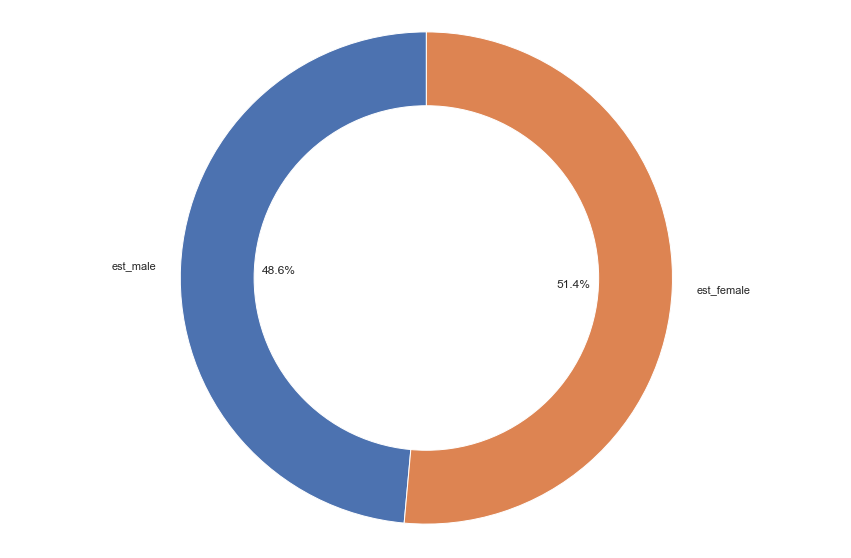

In [148]:
#summary statistics
data = dict(df[['est_male', 'est_female']].sum())
print(data)

fig1, ax1 = plt.subplots()
ax1.pie(data.values(), labels=data.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.title(store.street_address)
plt.show()

In [114]:
wawa = pd.read_csv(f"{data_path}/processed/wawa_full.csv")

In [106]:
dfs = []

for i, row in se.iterrows():
    try:
        d = eval(row['visitor_home_cbgs'])
        dfs.append(pd.DataFrame(data={"census_block_group": d.keys(), "visits": d.values()}))
    except:
        pass


se_cbg_visits = pd.concat(dfs)

In [104]:
pd.set_option('display.max_rows', 10)
wawa_stats = wawa_cbg_visits.groupby("census_block_group").sum()
wawa_stats.columns = ['visits_wawa']
wawa_stats

,visits_wawa
census_block_group,
010010202001,4
010030108002,4
010030113004,4
010279589001,8
010439645003,6
...,...
720891403002,4
721153304001,5
721270013021,4


In [108]:
se_stats = se_cbg_visits.groupby("census_block_group").sum()
se_stats.columns = ['visits_7_eleven']
se_stats

,visits_7_eleven
census_block_group,
010690409001,4
040130610324,4
040132168483,4
050070210012,4
051219603011,4
...,...
550390405002,4
550679604003,4
560379716001,4


In [112]:
pd.set_option('display.max_rows', 10)
cbg_visits = wawa_stats.merge(se_stats, how='outer', on='census_block_group')
cbg_visits.to_csv(f"{data_path}/processed/cbg_visits.csv")